# Agregacion de datos por categoria

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
gender = ["Male","Female"]
income = ["Poor", "Middle Class","Rich"]

In [3]:
n = 500

gender_data = []
income_data = []

In [4]:
for i in range(0,500):
    gender_data.append(np.random.choice(gender))
    income_data.append(np.random.choice(income))
    

In [5]:
gender_data[:10]

['Female',
 'Female',
 'Male',
 'Male',
 'Female',
 'Female',
 'Female',
 'Female',
 'Male',
 'Male']

In [6]:
income_data[:10]

['Rich',
 'Middle Class',
 'Middle Class',
 'Poor',
 'Middle Class',
 'Middle Class',
 'Poor',
 'Poor',
 'Rich',
 'Rich']

In [7]:
# z -> N(0,1) -> Desviacion normal entre 0 y 1
#N(m,s) -> m +s * z
height = 160 + 30 * np.random.randn(n)
weight = 65 + 25 * np.random.rand(n)
age = 30 + 12 * np.random.randn(n) 
income = 18000 + 35000 * np.random.rand(n)

In [8]:
data = pd.DataFrame(
    {
        "Gender" : gender_data,
        "Economic Status": income_data,
        "Height": height,
        "Weight" : weight,
        "Age" : age,
        "Income" : income
    })

In [9]:
data.head()

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Rich,168.167844,80.408354,47.207844,34368.273959
1,Female,Middle Class,171.031943,79.292848,12.691222,51064.436119
2,Male,Middle Class,210.464262,71.368725,28.831503,47509.725064
3,Male,Poor,123.268457,80.679003,60.791101,48686.572805
4,Female,Middle Class,185.318625,89.728205,27.373429,18362.809556


## Convertir FLOAT a INTEGER

In [10]:
data['Age'] = data['Age'].astype(int)

In [11]:
data.head()

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Rich,168.167844,80.408354,47,34368.273959
1,Female,Middle Class,171.031943,79.292848,12,51064.436119
2,Male,Middle Class,210.464262,71.368725,28,47509.725064
3,Male,Poor,123.268457,80.679003,60,48686.572805
4,Female,Middle Class,185.318625,89.728205,27,18362.809556


## Agrupacion de datos

### Agrupacion Sencilla

In [12]:
grouped_gender = data.groupby("Gender")

In [13]:
grouped_gender.groups

{'Female': Int64Index([  0,   1,   4,   5,   6,   7,  12,  13,  14,  15,
             ...
             479, 480, 483, 485, 487, 488, 489, 490, 493, 494],
            dtype='int64', length=245),
 'Male': Int64Index([  2,   3,   8,   9,  10,  11,  18,  21,  22,  23,
             ...
             482, 484, 486, 491, 492, 495, 496, 497, 498, 499],
            dtype='int64', length=255)}

In [14]:
for names, groups in grouped_gender:
    print (names)
    print (groups)

Female
     Gender Economic Status      Height     Weight  Age        Income
0    Female            Rich  168.167844  80.408354   47  34368.273959
1    Female    Middle Class  171.031943  79.292848   12  51064.436119
4    Female    Middle Class  185.318625  89.728205   27  18362.809556
5    Female    Middle Class  149.879549  75.560171   14  32035.937635
6    Female            Poor  202.225509  84.897601   27  39639.841307
7    Female            Poor  127.806170  68.184279   39  20236.532639
12   Female            Poor  172.332522  89.286059   42  51250.360252
13   Female            Rich  201.046275  85.421507   17  31816.441776
14   Female            Poor  226.733066  68.533510   44  19521.972903
15   Female    Middle Class  150.598991  81.025212   22  50252.815490
16   Female            Rich  151.224212  70.851627   39  48152.864741
17   Female            Rich  126.373814  65.516744   22  36654.197836
19   Female            Poor  156.127150  82.273837   40  19390.818748
20   Female  

In [15]:
tmp = grouped_gender.get_group("Female")

In [16]:
tmp.shape

(245, 6)

In [17]:
tmp = grouped_gender.get_group("Male")

In [18]:
tmp.shape

(255, 6)

### Agrupacion Doble

In [19]:
double_group = data.groupby(['Gender','Economic Status'])

In [20]:
len(double_group) ## Multiplica los valores de cada grupo  ( 2 * 3)

6

In [21]:
for names, groups in double_group:
    print (names)
    print (groups)

('Female', 'Middle Class')
     Gender Economic Status      Height     Weight  Age        Income
1    Female    Middle Class  171.031943  79.292848   12  51064.436119
4    Female    Middle Class  185.318625  89.728205   27  18362.809556
5    Female    Middle Class  149.879549  75.560171   14  32035.937635
15   Female    Middle Class  150.598991  81.025212   22  50252.815490
29   Female    Middle Class  165.697561  84.506568   27  48612.678209
31   Female    Middle Class  164.802001  75.998175   29  40965.144299
42   Female    Middle Class  144.165160  69.998959   50  18443.274669
45   Female    Middle Class  159.349802  79.930951   35  23629.774774
50   Female    Middle Class  184.366416  85.846375   12  42142.320735
58   Female    Middle Class  150.254194  76.401936   29  44390.314470
59   Female    Middle Class  141.066680  81.158724   34  47563.523233
60   Female    Middle Class  159.783428  88.844140   33  42046.832019
62   Female    Middle Class  162.912911  89.176611   28  33845.

## Operaciones sobre datos agrupados

In [22]:
double_group.sum()

Height       Weight   Age        Income
Gender Economic Status                                               
Female Middle Class     11363.671527  5672.363784  2161  2.571844e+06
       Poor             14121.911675  6788.263039  2731  2.995245e+06
       Rich             13166.508115  6490.984861  2608  3.057976e+06
Male   Middle Class     12143.190922  5801.487727  2301  2.685063e+06
       Poor             13769.310068  6836.568904  2471  2.980300e+06
       Rich             15046.770377  7102.438284  2879  3.340857e+06

In [23]:
double_group.mean()# Promedio

Height     Weight        Age        Income
Gender Economic Status                                                
Female Middle Class     155.666733  77.703613  29.602740  35230.734856
       Poor             160.476269  77.139353  31.034091  34036.875048
       Rich             156.744144  77.273629  31.047619  36404.476824
Male   Middle Class     161.909212  77.353170  30.680000  35800.835079
       Poor             156.469433  77.688283  28.079545  33867.042520
       Rich             163.551852  77.200416  31.293478  36313.658955

In [24]:
double_group.size()# Cuantos elementos tiene esa categoria

Gender  Economic Status
Female  Middle Class       73
        Poor               88
        Rich               84
Male    Middle Class       75
        Poor               88
        Rich               92
dtype: int64

In [25]:
double_group.describe()

Age                                                 \
                       count       mean        std  min    25%   50%    75%   
Gender Economic Status                                                        
Female Middle Class     73.0  29.602740  12.134363  3.0  22.00  29.0  36.00   
       Poor             88.0  31.034091  11.434420 -2.0  24.00  32.0  39.00   
       Rich             84.0  31.047619  12.446420 -2.0  22.75  30.0  40.00   
Male   Middle Class     75.0  30.680000  11.763618  9.0  22.50  29.0  39.00   
       Poor             88.0  28.079545  12.221351 -4.0  21.00  28.0  36.25   
       Rich             92.0  31.293478  11.476242  6.0  23.00  30.5  40.00   

                             Height                ...            Income  \
                         max  count        mean    ...               75%   
Gender Economic Status                             ...                     
Female Middle Class     68.0   73.0  155.666733    ...      42479.486699   
       Poor             54.0   88.0  160.476269    ...      45040.526703   
       Rich             67.0   84.0  156.744144    ...      45066.771759   
Male   Middle Class     62.0   75.0  161.909212    ...      46350.426606   
       Poor             60.0   88.0  156.469433    ...      41582.760859   
       Rich             65.0   92.0  163.551852    ...      45360.503358   

                                     Weight                                  \
                                 max  count       mean       std        min   
Gender Economic Status                                                        
Female Middle Class     52181.421511   73.0  77.703613  7.340857  65.034754   
       Poor             52877.539951   88.0  77.139353  7.940909  65.369971   
       Rich             52594.693462   84.0  77.273629  6.926887  65.266213   
Male   Middle Class     52876.286705   75.0  77.353170  6.857541  65.500237   
       Poor             52507.567035   88.0  77.688283  7.114827  65.114239   
       Rich             52797.498784   92.0  77.200416  7.359748  65.185287   

                                                                    
                              25%        50%        75%        max  
Gender Economic Status                                              
Female Middle Class     71.623986  78.349258  83.563619  89.963950  
       Poor             70.146795  76.301333  84.246136  89.890459  
       Rich             71.192755  77.468536  82.034824  89.722498  
Male   Middle Class     71.347995  77.475688  82.294472  89.722183  
       Poor             72.779571  77.356738  83.291327  89.871012  
       Rich             70.686152  77.924487  83.161953  89.875110  

[6 rows x 32 columns]

### Una agrupacion es en si un DataSets

In [26]:
grouped_income = double_group["Income"]

In [27]:
grouped_income.describe()

count          mean           std           min  \
Gender Economic Status                                                    
Female Middle Class      73.0  35230.734856  10005.227090  18032.660840   
       Poor              88.0  34036.875048  10844.417646  18146.716725   
       Rich              84.0  36404.476824  10069.868138  19629.701034   
Male   Middle Class      75.0  35800.835079  10460.778174  18191.482751   
       Poor              88.0  33867.042520   9998.879004  18011.983294   
       Rich              92.0  36313.658955   9955.503125  18019.128214   

                                 25%           50%           75%           max  
Gender Economic Status                                                          
Female Middle Class     27675.336909  33845.943376  42479.486699  52181.421511  
       Poor             22980.349549  32572.880916  45040.526703  52877.539951  
       Rich             26536.923484  36353.198439  45066.771759  52594.693462  
Male   Middle Class     27820.363202  33520.265333  46350.426606  52876.286705  
       Poor             25188.157062  34208.722715  41582.760859  52507.567035  
       Rich             28371.544608  37375.484489  45360.503358  52797.498784

In [28]:
# np.sum = Suma los valores de Income
# np.mean = obtener el promedio
# np.std = Obitne la desviacion estandar

double_group.aggregate({
    "Income":np.sum,
    "Age" : np.mean,
    "Height": np.std
})

Income        Age     Height
Gender Economic Status                                    
Female Middle Class     2.571844e+06  29.602740  26.551967
       Poor             2.995245e+06  31.034091  28.067600
       Rich             3.057976e+06  31.047619  27.938298
Male   Middle Class     2.685063e+06  30.680000  29.503522
       Poor             2.980300e+06  28.079545  32.138968
       Rich             3.340857e+06  31.293478  27.927853

### Aplicar una funcion para agregar a los agrupados

In [29]:
double_group.aggregate({
    "Age" : np.mean,
    "Height": lambda h : np.mean(h)/np.std(h)
})

Age    Height
Gender Economic Status                     
Female Middle Class     29.602740  5.903292
       Poor             31.034091  5.750257
       Rich             31.047619  5.644065
Male   Middle Class     30.680000  5.524748
       Poor             28.079545  4.896427
       Rich             31.293478  5.888316

### Aplicar varias funciones a los agrupados

In [30]:
double_group.aggregate([np.sum,np.mean,np.std])

Height                              Weight  \
                                 sum        mean        std          sum   
Gender Economic Status                                                     
Female Middle Class     11363.671527  155.666733  26.551967  5672.363784   
       Poor             14121.911675  160.476269  28.067600  6788.263039   
       Rich             13166.508115  156.744144  27.938298  6490.984861   
Male   Middle Class     12143.190922  161.909212  29.503522  5801.487727   
       Poor             13769.310068  156.469433  32.138968  6836.568904   
       Rich             15046.770377  163.551852  27.927853  7102.438284   

                                              Age                        \
                             mean       std   sum       mean        std   
Gender Economic Status                                                    
Female Middle Class     77.703613  7.340857  2161  29.602740  12.134363   
       Poor             77.139353  7.940909  2731  31.034091  11.434420   
       Rich             77.273629  6.926887  2608  31.047619  12.446420   
Male   Middle Class     77.353170  6.857541  2301  30.680000  11.763618   
       Poor             77.688283  7.114827  2471  28.079545  12.221351   
       Rich             77.200416  7.359748  2879  31.293478  11.476242   

                              Income                              
                                 sum          mean           std  
Gender Economic Status                                            
Female Middle Class     2.571844e+06  35230.734856  10005.227090  
       Poor             2.995245e+06  34036.875048  10844.417646  
       Rich             3.057976e+06  36404.476824  10069.868138  
Male   Middle Class     2.685063e+06  35800.835079  10460.778174  
       Poor             2.980300e+06  33867.042520   9998.879004  
       Rich             3.340857e+06  36313.658955   9955.503125

In [31]:
#Pasar una lambda
double_group.aggregate([lambda x : np.mean(x)/ np.std(x)])

Height     Weight       Age    Income
                        <lambda>   <lambda>  <lambda>  <lambda>
Gender Economic Status                                         
Female Middle Class     5.903292  10.658342  2.456462  3.545602
       Poor             5.750257   9.769841  2.729648  3.156641
       Rich             5.644065  11.222608  2.509484  3.636902
Male   Middle Class     5.524748  11.355976  2.625604  3.445434
       Poor             4.896427  10.981784  2.310748  3.406494
       Rich             5.888316  10.547024  2.741747  3.667584

### Filtrado de Datos

In [32]:
double_group.sum()

Height       Weight   Age        Income
Gender Economic Status                                               
Female Middle Class     11363.671527  5672.363784  2161  2.571844e+06
       Poor             14121.911675  6788.263039  2731  2.995245e+06
       Rich             13166.508115  6490.984861  2608  3.057976e+06
Male   Middle Class     12143.190922  5801.487727  2301  2.685063e+06
       Poor             13769.310068  6836.568904  2471  2.980300e+06
       Rich             15046.770377  7102.438284  2879  3.340857e+06

In [34]:
double_group["Age"].filter(lambda x: x.sum() > 2400 )

0      47
3      60
6      27
7      39
8      18
9      41
10     55
11     13
12     42
13     17
14     44
16     39
17     22
18     28
19     40
20     31
21     40
22     33
23     43
24     46
25     25
26     11
27     -4
28     31
34     47
35      9
36     40
37     34
38     31
39     27
       ..
461    40
462    22
463    22
464    35
465    23
468    39
470    32
471    22
473    37
474    51
475    25
476    19
477    29
478    25
480    27
481    13
482    29
483    34
484    11
485    20
486    21
487    38
489    23
490    33
493    37
494    -2
495    38
496    43
497    23
499    23
Name: Age, Length: 352, dtype: int64

### Tranformacion de Variables

In [44]:
zscore = lambda x: (x- x.mean())/x.std()

In [45]:
z_group = double_group.transform(zscore)

(array([  6.,  16.,  42., 100., 121.,  95.,  75.,  34.,   6.,   5.]),
 array([-2.88900462, -2.28367008, -1.67833554, -1.073001  , -0.46766646,
         0.13766808,  0.74300262,  1.34833716,  1.9536717 ,  2.55900624,
         3.16434078]),
 <a list of 10 Patch objects>)

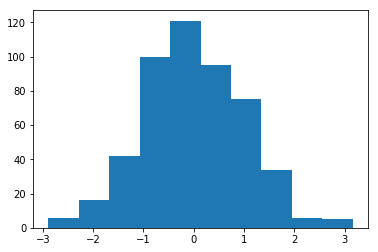

In [46]:
plt.hist(z_group["Age"])
# Hemos Tipificado los datos

### Transformacion de valores usando una lambda 
Nos permite pasar una funciona cada columna del DataSet y aplicarle una funcion personalizada

In [47]:
fill_na_mean = lambda x : x.fillna(x.mean())

In [48]:
double_group.transform(fill_na_mean)

,Height,Weight,Age,Income
0,168.167844,80.408354,47,34368.273959
1,171.031943,79.292848,12,51064.436119
2,210.464262,71.368725,28,47509.725064
3,123.268457,80.679003,60,48686.572805
4,185.318625,89.728205,27,18362.809556
5,149.879549,75.560171,14,32035.937635
6,202.225509,84.897601,27,39639.841307
7,127.806170,68.184279,39,20236.532639
8,196.674652,89.457137,18,51128.615423
9,160.472297,68.178685,41,29634.177362


## Operaciona Diversas muy utiles

### Seleccionar el 1 Primer elemento del grupo

In [50]:

double_group.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Rich,168.167844,80.408354,47,34368.273959
1,Female,Middle Class,171.031943,79.292848,12,51064.436119
2,Male,Middle Class,210.464262,71.368725,28,47509.725064
3,Male,Poor,123.268457,80.679003,60,48686.572805
6,Female,Poor,202.225509,84.897601,27,39639.841307
8,Male,Rich,196.674652,89.457137,18,51128.615423


### Seleccionar el Ultimo elemento del grupo

In [51]:
double_group.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
488,Female,Middle Class,154.726698,80.392257,25,43950.107281
493,Female,Poor,136.695629,69.117388,37,18477.148934
494,Female,Rich,139.911576,83.148204,-2,26108.893072
497,Male,Poor,125.062415,80.123107,23,21089.198235
498,Male,Middle Class,135.595588,68.781820,34,51033.171848
499,Male,Rich,153.608306,82.256608,23,52797.498784


### Seleccionar un lugar N del grupo (32)

In [52]:
double_group.nth(32)

Age      Height        Income     Weight
Gender Economic Status                                          
Female Middle Class      36  158.383824  48835.785284  75.389398
       Poor              34  183.334167  42568.703657  73.451368
       Rich              24  134.401695  39142.701855  84.865352
Male   Middle Class      34  194.640281  21654.359673  84.402535
       Poor              11  150.594337  43659.856325  86.428052
       Rich              32  188.163061  37019.337645  65.185287

In [54]:
double_group.nth(82)

Age      Height        Income     Weight
Gender Economic Status                                          
Female Poor              51  156.963049  19319.297534  73.240280
       Rich              33  179.195837  49425.024791  78.736974
Male   Poor              22  138.193606  35986.395272  83.112463
       Rich              34  188.278567  46335.289602  70.384979

## Ordenamientos

In [55]:
#Primero ordeanamos por Age y luego por Income
data_sorted = data.sort_values(["Age","Income"]) 

In [56]:
data_sorted.head()

,Gender,Economic Status,Height,Weight,Age,Income
27,Male,Poor,211.996267,85.971239,-4,32960.358541
243,Female,Poor,109.852460,89.110414,-2,23029.644643
494,Female,Rich,139.911576,83.148204,-2,26108.893072
150,Female,Poor,152.342350,66.098071,0,20791.810369
397,Female,Rich,142.084336,84.809444,1,40101.338991


In [64]:
age_grouped = data_sorted.groupby("Gender")

In [65]:
age_grouped.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
27,Male,Poor,211.996267,85.971239,-4,32960.358541
243,Female,Poor,109.852460,89.110414,-2,23029.644643


In [66]:
age_grouped.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
141,Male,Rich,189.872930,66.825522,65,28260.087065
425,Female,Middle Class,121.848115,86.847062,68,26565.888357


## Conjunto de entrenamiento y conjunto de testing

In [67]:
data = pd.read_csv("../datasets/customer-churn-model/Customer Churn Model.txt")

In [68]:
data.shape

(3333, 21)

### Dividr utilizando la distribucion normal
Puede ser reproducible estableciendo la semilla antes de hacer el randn

In [79]:
a = np.random.randn(len(data))

(array([  6.,  31., 127., 365., 796., 889., 677., 337.,  92.,  13.]),
 array([-3.69045008, -3.00052098, -2.31059187, -1.62066276, -0.93073365,
        -0.24080455,  0.44912456,  1.13905367,  1.82898277,  2.51891188,
         3.20884099]),
 <a list of 10 Patch objects>)

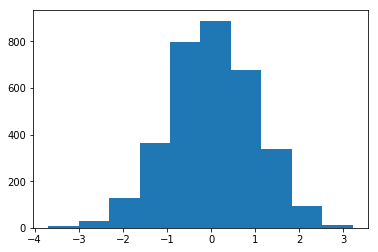

In [80]:
plt.hist(a)

In [90]:
check = (a < 0.75)

In [91]:
check

array([ True,  True,  True, ...,  True,  True,  True])

(array([ 777.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2556.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

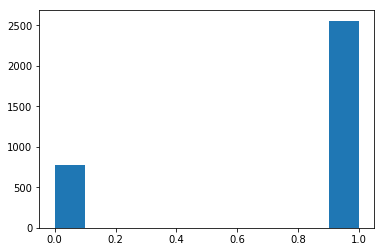

In [92]:
plt.hist(check.astype(int))

In [93]:
training = data[check]
testing = data[~check]

In [94]:
print(len(training))
print(len(testing))

2556
777


### Con la libreria sklearn
No puede ser reproducicle por que el calculo se hace internamente

In [96]:
from sklearn.cross_validation import train_test_split

In [97]:
train, test = train_test_split(data,test_size = 0.2)

In [98]:
print(len(train))
print(len(test))

2666
667


### Usando una funcion de shuffle

In [99]:
data.head()

,State,Account Length,Area Code,Phone,Intl Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [102]:
import sklearn

data = sklearn.utils.shuffle(data)

In [104]:
cut_id = int(0.75*len(data))
train_data = data[:cut_id]

In [105]:
cut_id+=1
test_data = data[cut_id:]

In [106]:
print(len(train_data))
print(len(test_data))

2499
833
